> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I used No-show appointments dataset
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
There are many factors such as :<br>
1.Gender<br>
2.Age<br>
3.Scholarship<br>
4.Hipertension<br>
5.Diabetes<br>
6.Alcoholism<br>
7.SMS_received<br>

In [17]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.


import numpy as np

import pandas as pd

import matplotlib.pyplot as plt 

import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [18]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
show_data=pd.read_csv('KaggleV2-May-2016.csv')
show_data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [19]:
#We will clean the dataset
show_data.describe()
#we found out Age has some negative values so we will remove negative values
show_data = show_data[show_data.Age>0]

#then checking if there null values
show_data.isnull().any().sum()

#finally checking if there duplicated values
sum(show_data.duplicated())


0

In [20]:
#we found out the dataset is quite clean 

#But there is an issue that the column of show is meaningless

#So I chnaged its and its values to meaningful values.

show_data.rename(columns={'No-show': 'Show'},inplace=True)

show_data['Show'] = show_data.Show.transform(lambda x: 1 if (x == 'Yes') else 0)

In [21]:
show_data.groupby('PatientId')[['Show']].apply(sum).count()
show_data.groupby('Show').count()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Show,,,,,,,,,,,,,
0,85307,85307,85307,85307,85307,85307,85307,85307,85307,85307,85307,85307,85307
1,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680


<a id='eda'></a>
## Exploratory Data Analysis

###  We will plot relationships across the entire dataframe by Gender


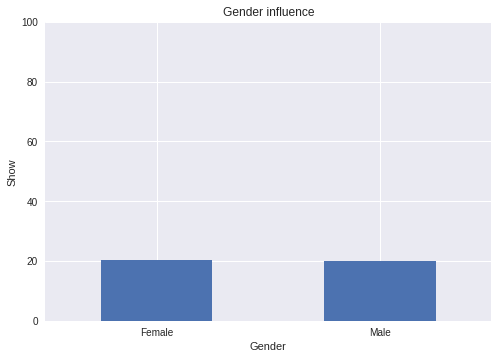

In [22]:
#Here we will check if the Gender has effect on the appointments 
table=show_data.groupby('Gender')['Show'].mean()*100

#plot
ax=table.plot.bar()
ax.set(title='Gender influence',xlabel='Gender',ylabel='Show',ylim=[0,100])
ax.set_xticklabels(['Female','Male'],rotation=0)
plt.show()

<a id='ea'></a>
## Result of Gender exploration 

#### percentage of males almost equal  percentage of females

## So Gender has no influence


<a id='ea'></a>
## Age exploration 




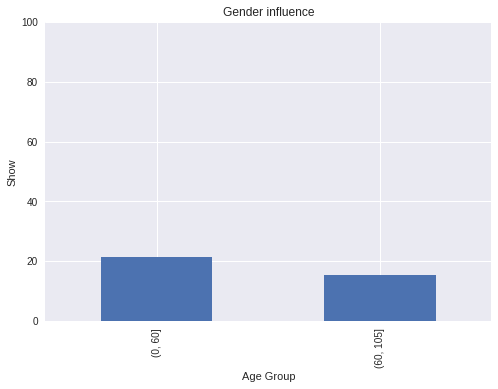

In [23]:
#categorize age
age_group=pd.cut(show_data['Age'],[0,60,105])

table=show_data.groupby(age_group)['Show'].mean()*100
#plot
ax=table.plot.bar()
ax.set(title='Gender influence',xlabel='Age Group',ylabel='Show',ylim=[0,100])

plt.show()

<a id='ea'></a>
## Result of Age exploration 

#### Age has no influence


### we investigate the Scholarship factor to decide if it has effect on the appointments


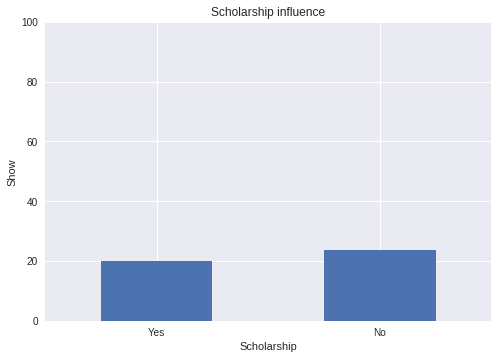

In [24]:
table=show_data.groupby('Scholarship')['Show'].mean()*100

#plot
ax=table.plot.bar()
ax.set(title='Scholarship influence',xlabel='Scholarship',ylabel='Show',ylim=[0,100] )
ax.set_xticklabels(['Yes','No'],rotation=0)
plt.show()

### The number of people who has Scholarship and attend their appointments = 8283 and their percentage equals about 9.4%

### The number of people who has no Scholarship and attend their appointments = 79925 and their percentage equals about 90.6%


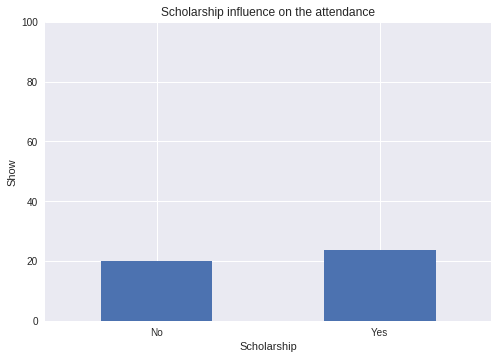

In [25]:
ax=table.plot.bar()
ax.set(title='Scholarship influence on the attendance',xlabel='Scholarship',ylabel='Show',ylim=[0,100])
ax.set_xticklabels(['No','Yes'],rotation=0)
plt.show()

## Result Data Analysis

### Scholarship almost  has no influence 


## Exploratory Data Analysis

### we investigate the Hipertension factor to decide if it has effect on the appointments


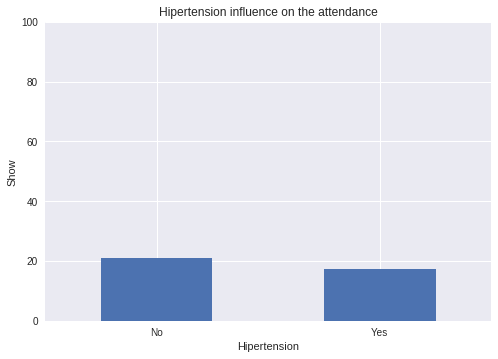

In [26]:
table=show_data.groupby('Hipertension')['Show'].mean()*100

#plot

ax=table.plot.bar()
ax.set(title='Hipertension influence on the attendance',xlabel='Hipertension',ylabel='Show',ylim=[0,100])
ax.set_xticklabels(['No','Yes'],rotation=0)
plt.show()

## Result Data Analysis

### the Hipertension factor has no effect on the appointments


## Exploratory Data Analysis

### we investigate the Diabetes factor to decide if it has effect on the appointments


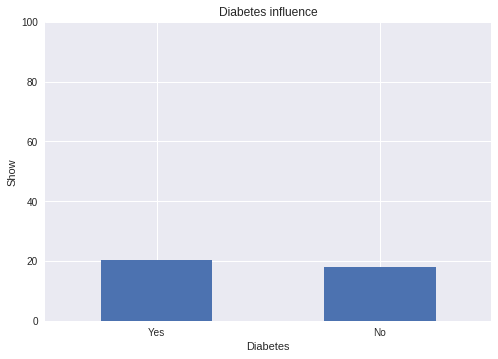

In [27]:
table=show_data.groupby('Diabetes')['Show'].mean()*100

#plot
ax=table.plot.bar()
ax.set(title='Diabetes influence',xlabel='Diabetes',ylabel='Show',ylim=[0,100] )
ax.set_xticklabels(['Yes','No'],rotation=0)
plt.show()


### The number of people who has Diabetes and attend their appointments = 6513 and their percentage equals about 7%

### The number of people who has no Diabetes and attend their appointments = 81695 and their percentage equals about 93%


## Result Data Analysis

### So Diabetes almost  has no influence 


## Exploratory Data Analysis

### we investigate the Alcoholism factor to decide if it has effect on the appointments


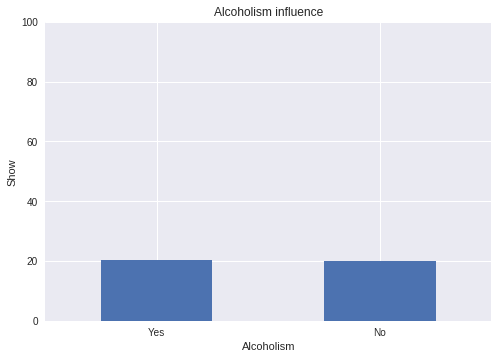

In [28]:
table=show_data.groupby('Alcoholism')['Show'].mean()*100

#plot
ax=table.plot.bar()
ax.set(title='Alcoholism influence',xlabel='Alcoholism',ylabel='Show',ylim=[0,100] )
ax.set_xticklabels(['Yes','No'],rotation=0)
plt.show()


### The number of people who has Diabetes and attend their appointments = 2683 and their percentage equals about 3%

### The number of people who has no Diabetes and attend their appointments = 81695 and their percentage equals about 97%


### So Alcoholism almost  has no influence 


## Exploratory Data Analysis

### we investigate the SMS_received factor to decide if it has effect on the appointments


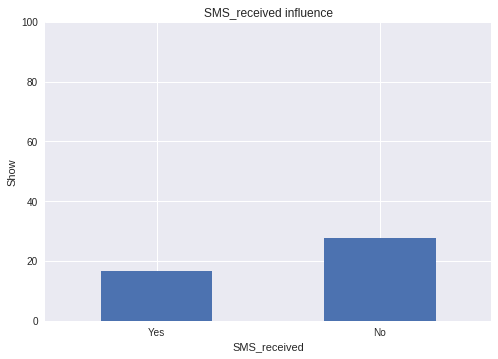

In [39]:
table=show_data.groupby('SMS_received')['Show'].mean()*100

#plot
ax=table.plot.bar()
ax.set(title='SMS_received influence',xlabel='SMS_received',ylabel='Show',ylim=[0,100] )
ax.set_xticklabels(['Yes','No'],rotation=0)
plt.show()


### The number of people who recevied sms and attend their appointments = 25698 and their percentage equals about 30%

### The number of people who recevied sms and attend their appointments = 62510 and their percentage equals about 70%



## Result Data Analysis

### the SMS_received factor has quite effect on the appointments


<a id='conclusions'></a>
## Conclusions

In conclusion we investigate seven factors which are related to the dataset and our dataset has unrealistic values such as negative age so we drop those values. then we started to explore it to answer our initial question which it was 'What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? ' and we found out that<br>
there are four factors which affect the appointments:<br>


#### 1.SMS_received
Its percentage equals about 30%

And the others factors almost don't affect the appointments:<br>
#### 1.Gender
#### 2.Scholarship     
#### 3.Alcoholism       
#### 4.Diabetes 
#### 5.Age
#### 6.Hipertension

In the future analysis we will work on those factors:<br>
#### 1.ScheduledDay    
#### 2.AppointmentDay
#### 3.Neighbourhood   
#### 4.Handcap   

### we have eleven factors in our dataset and we investigate seven ones and  the remain four factors may have the  same probability of each factor So I think that may limit our result





In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0